# Training Log Visualization

This notebook demonstrates how to load your training log CSV file and produce clear, modern-styled plots that visualize:
- **Training Loss vs. Epoch**: How the training loss decreases over epochs.
- **Validation Metrics vs. Epoch**: Trends of validation accuracy, precision, recall, and F1 score.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Set a modern style for the plots
plt.style.use('ggplot')

## Malware


In [11]:
# Load the CSV log file into a DataFrame
# df = pd.read_csv("logs/training_logs_20250316_175247.csv")
# df = pd.read_csv("../logs/training_logs_20250316_213105.csv")
df = pd.read_csv("../logs/dga_prajjwal1-bert-medium_training_logs_20250503_145342.csv")


df.head()


,run_id,epoch,train_loss,val_loss,val_acc,val_precision,val_recall,val_f1,timestamp
0,20250503_145342,1,0.347789,0.095239,0.96800,0.961225,0.975590,0.968354,2025-05-03 14:54:32
1,20250503_145342,2,0.083697,0.062335,0.97735,0.969712,0.985653,0.977617,2025-05-03 14:55:22
2,20250503_145342,3,0.058982,0.049296,0.98265,0.981419,0.984059,0.982737,2025-05-03 14:56:12
3,20250503_145342,4,0.045737,0.044966,0.98345,0.982214,0.984856,0.983533,2025-05-03 14:57:02
4,20250503_145342,5,0.035746,0.044406,0.98435,0.983300,0.985553,0.984426,2025-05-03 14:57:52


### Plot 1: Training Loss vs. Epoch

This plot shows the trend of the training loss over the epochs. Monitoring the loss helps understand if the model is converging.


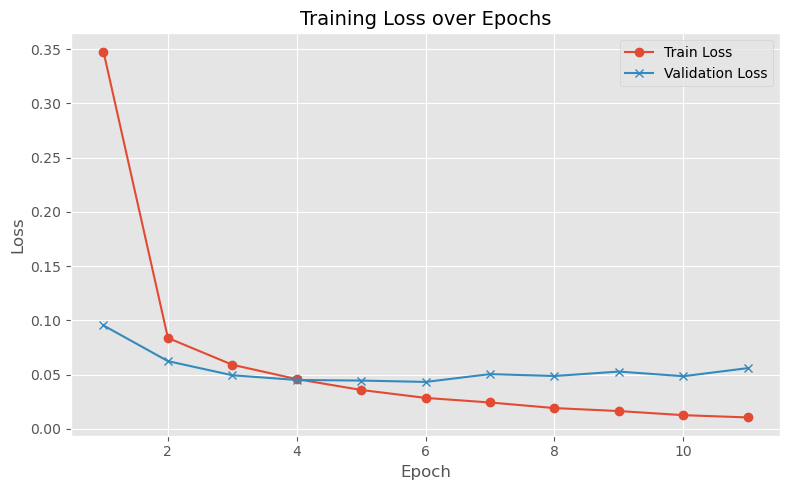

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['train_loss'], marker='o', linestyle='-', label='Train Loss')
plt.plot(df['epoch'], df['val_loss'], marker='x', linestyle='-', label='Validation Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss over Epochs', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


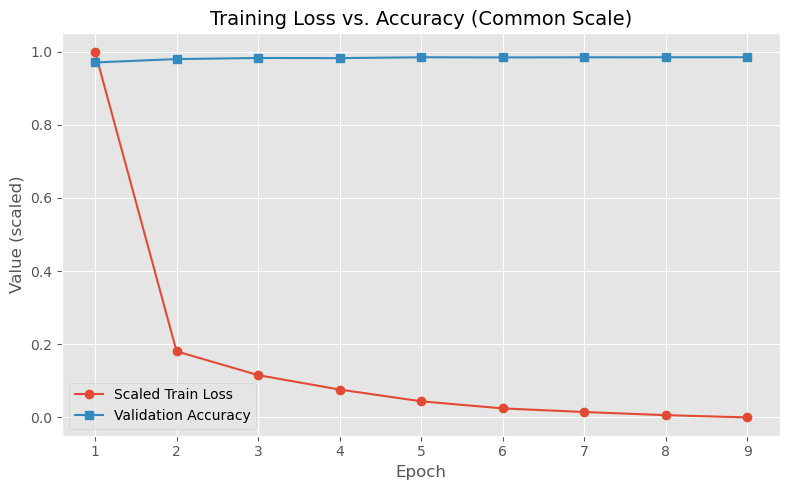

In [7]:
# 1. Apply min-max scaling to the train_loss so that it lies between 0 and 1
loss_min = df['train_loss'].min()
loss_max = df['train_loss'].max()
df['scaled_loss'] = (df['train_loss'] - loss_min) / (loss_max - loss_min)

# 2. Plot both scaled loss and accuracy on the same y-axis
plt.figure(figsize=(8, 5))

plt.plot(df['epoch'], df['scaled_loss'], marker='o', linestyle='-', label='Scaled Train Loss')
plt.plot(df['epoch'], df['val_acc'], marker='s', linestyle='-', label='Validation Accuracy')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Value (scaled)', fontsize=12)
plt.title('Training Loss vs. Accuracy (Common Scale)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot 2: Validation Metrics vs. Epoch

This plot visualizes several validation metrics over the epochs:
- **Validation Accuracy**
- **Validation Precision**
- **Validation Recall**
- **Validation F1 Score**

Different markers are used to distinguish each metric.


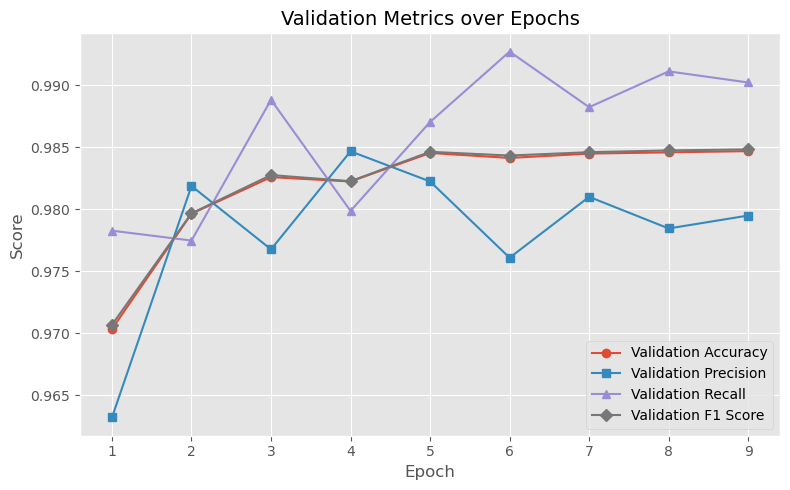

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['val_acc'], marker='o', linestyle='-', label='Validation Accuracy')
plt.plot(df['epoch'], df['val_precision'], marker='s', linestyle='-', label='Validation Precision')
plt.plot(df['epoch'], df['val_recall'], marker='^', linestyle='-', label='Validation Recall')
plt.plot(df['epoch'], df['val_f1'], marker='D', linestyle='-', label='Validation F1 Score')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Validation Metrics over Epochs', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


## Phishing

In [11]:
# Load the CSV log file into a DataFrame
df = pd.read_csv("logs/phishing_training_logs_20250317_133935.csv")

df.head()


,run_id,epoch,train_loss,val_acc,val_precision,val_recall,val_f1,timestamp
0,20250317_133935,1,0.243200,0.93096,0.940775,0.920728,0.930644,2025-03-17 13:41:08
1,20250317_133935,2,0.147737,0.93812,0.955936,0.919377,0.937300,2025-03-17 13:42:44
2,20250317_133935,3,0.114278,0.93928,0.950322,0.927805,0.938928,2025-03-17 13:44:19
3,20250317_133935,4,0.084517,0.93968,0.964655,0.913572,0.938419,2025-03-17 13:45:54
4,20250317_133935,5,0.059322,0.93964,0.939206,0.940924,0.940064,2025-03-17 13:47:29


### Plot 1: Training Loss vs. Epoch

This plot shows the trend of the training loss over the epochs. Monitoring the loss helps understand if the model is converging.


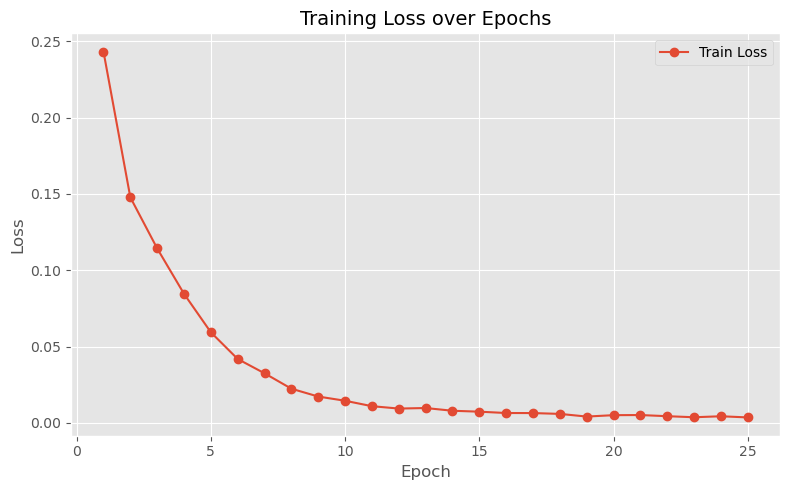

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['train_loss'], marker='o', linestyle='-', label='Train Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss over Epochs', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


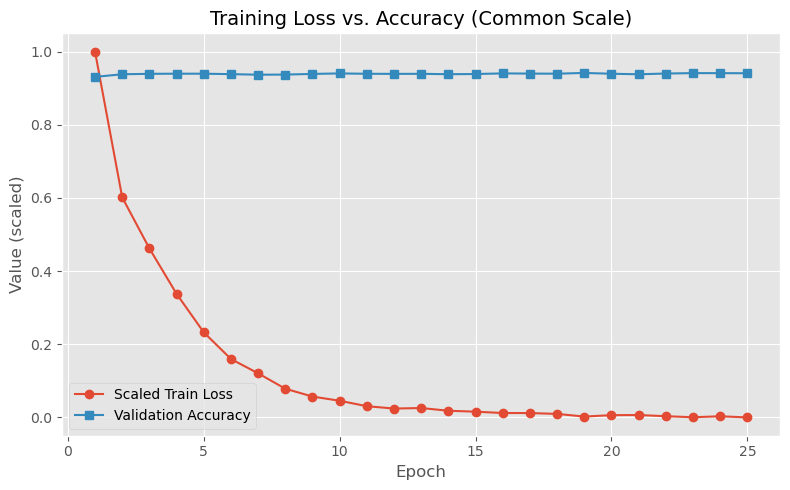

In [13]:
# 1. Apply min-max scaling to the train_loss so that it lies between 0 and 1
loss_min = df['train_loss'].min()
loss_max = df['train_loss'].max()
df['scaled_loss'] = (df['train_loss'] - loss_min) / (loss_max - loss_min)

# 2. Plot both scaled loss and accuracy on the same y-axis
plt.figure(figsize=(8, 5))

plt.plot(df['epoch'], df['scaled_loss'], marker='o', linestyle='-', label='Scaled Train Loss')
plt.plot(df['epoch'], df['val_acc'], marker='s', linestyle='-', label='Validation Accuracy')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Value (scaled)', fontsize=12)
plt.title('Training Loss vs. Accuracy (Common Scale)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot 2: Validation Metrics vs. Epoch

This plot visualizes several validation metrics over the epochs:
- **Validation Accuracy**
- **Validation Precision**
- **Validation Recall**
- **Validation F1 Score**

Different markers are used to distinguish each metric.


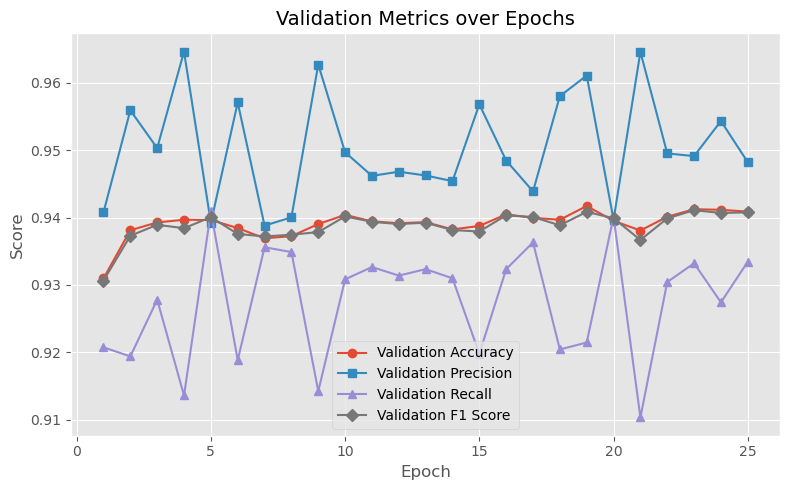

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['val_acc'], marker='o', linestyle='-', label='Validation Accuracy')
plt.plot(df['epoch'], df['val_precision'], marker='s', linestyle='-', label='Validation Precision')
plt.plot(df['epoch'], df['val_recall'], marker='^', linestyle='-', label='Validation Recall')
plt.plot(df['epoch'], df['val_f1'], marker='D', linestyle='-', label='Validation F1 Score')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Validation Metrics over Epochs', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


## DGA

In [3]:
# Load the CSV log file into a DataFrame
df = pd.read_csv("logs/dga_training_logs_20250317_142145.csv")

df.head()


,run_id,epoch,train_loss,val_acc,val_precision,val_recall,val_f1,timestamp
0,20250317_142145,1,0.094135,0.98264,0.979165,0.986483,0.982811,2025-03-17 14:23:18
1,20250317_142145,2,0.038284,0.98592,0.982782,0.989346,0.986053,2025-03-17 14:24:53
2,20250317_142145,3,0.025164,0.98616,0.985165,0.987358,0.986260,2025-03-17 14:26:27
3,20250317_142145,4,0.016970,0.98656,0.985793,0.987517,0.986654,2025-03-17 14:28:02
4,20250317_142145,5,0.010344,0.98584,0.983161,0.988789,0.985967,2025-03-17 14:29:37


### Plot 1: Training Loss vs. Epoch

This plot shows the trend of the training loss over the epochs. Monitoring the loss helps understand if the model is converging.


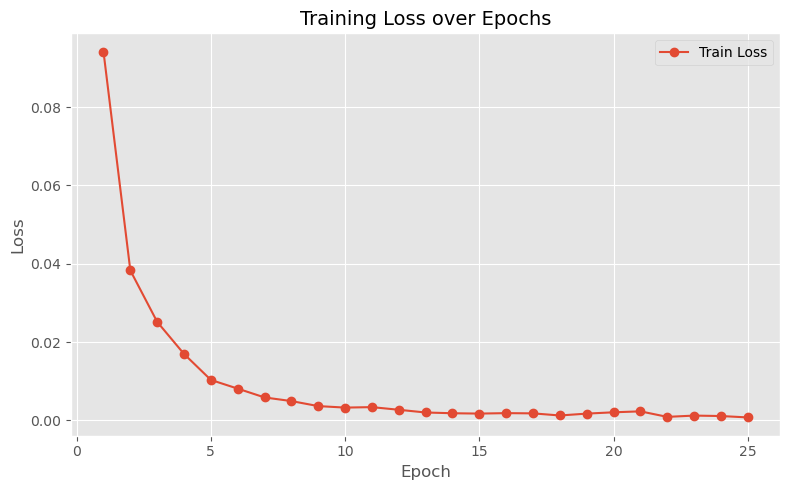

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['train_loss'], marker='o', linestyle='-', label='Train Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss over Epochs', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


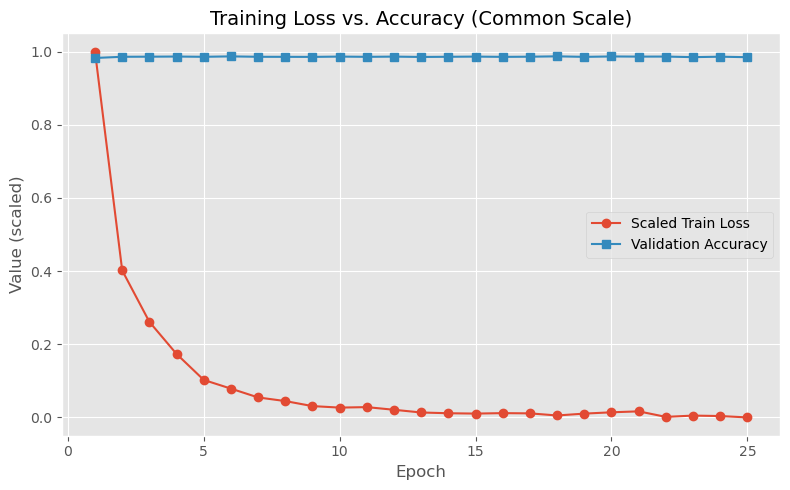

In [5]:
# 1. Apply min-max scaling to the train_loss so that it lies between 0 and 1
loss_min = df['train_loss'].min()
loss_max = df['train_loss'].max()
df['scaled_loss'] = (df['train_loss'] - loss_min) / (loss_max - loss_min)

# 2. Plot both scaled loss and accuracy on the same y-axis
plt.figure(figsize=(8, 5))

plt.plot(df['epoch'], df['scaled_loss'], marker='o', linestyle='-', label='Scaled Train Loss')
plt.plot(df['epoch'], df['val_acc'], marker='s', linestyle='-', label='Validation Accuracy')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Value (scaled)', fontsize=12)
plt.title('Training Loss vs. Accuracy (Common Scale)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot 2: Validation Metrics vs. Epoch

This plot visualizes several validation metrics over the epochs:
- **Validation Accuracy**
- **Validation Precision**
- **Validation Recall**
- **Validation F1 Score**

Different markers are used to distinguish each metric.


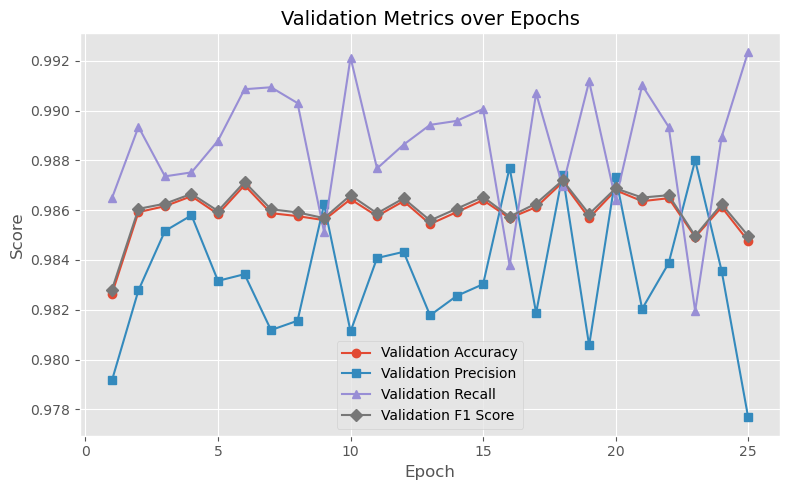

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['val_acc'], marker='o', linestyle='-', label='Validation Accuracy')
plt.plot(df['epoch'], df['val_precision'], marker='s', linestyle='-', label='Validation Precision')
plt.plot(df['epoch'], df['val_recall'], marker='^', linestyle='-', label='Validation Recall')
plt.plot(df['epoch'], df['val_f1'], marker='D', linestyle='-', label='Validation F1 Score')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Validation Metrics over Epochs', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


## Model comparisons

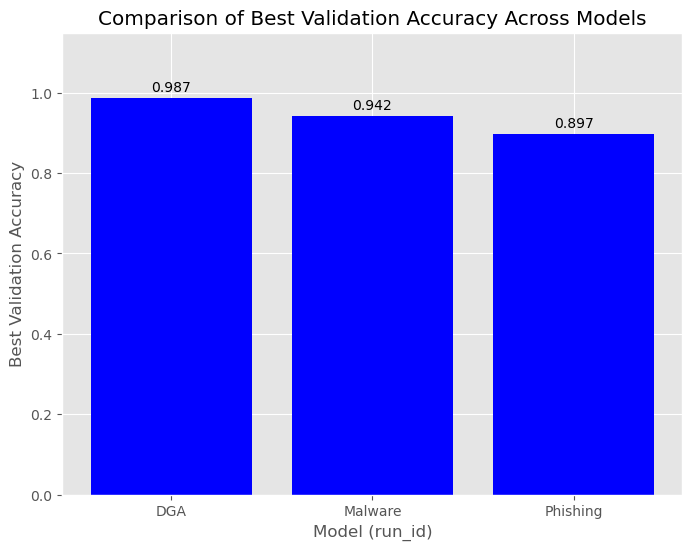

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV log files for each model
log_dir = "logs"
csv_files = [
    f"{log_dir}/dga_training_logs_20250317_142145.csv", 
    f"{log_dir}/phishing_training_logs_20250317_133935.csv",
    f"{log_dir}/training_logs_20250316_213105.csv"
    ]

# Dictionary to store the best validation accuracy for each model
model_accuracies = {}

# Custom model names to be used on the x-axis
custom_names = ["DGA", "Malware", "Phishing"]

# Process each CSV file
for i, file in enumerate(csv_files):
    # Read the training log
    df = pd.read_csv(file)
    # Get the run_id (assumed to be constant in each file)
    run_id = df['run_id'].iloc[0]
    model_name = custom_names[i]
    # Compute the best validation accuracy (across all epochs)
    best_val_acc = df['val_acc'].max()
    model_accuracies[model_name] = best_val_acc

# Create a bar chart comparing the best validation accuracy of each model
plt.figure(figsize=(8, 6))
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color='blue')
plt.xlabel('Model (run_id)')
plt.ylabel('Best Validation Accuracy')
plt.title('Comparison of Best Validation Accuracy Across Models')
plt.ylim(0, 1.15)  # Accuracy is typically between 0 and 1

# Add annotations above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: center of the bar
        height + 0.01,                     # Y-coordinate: just above the bar
        f'{height:.3f}',                   # Format the text to 3 decimal places
        ha='center', va='bottom'
    )

plt.show()

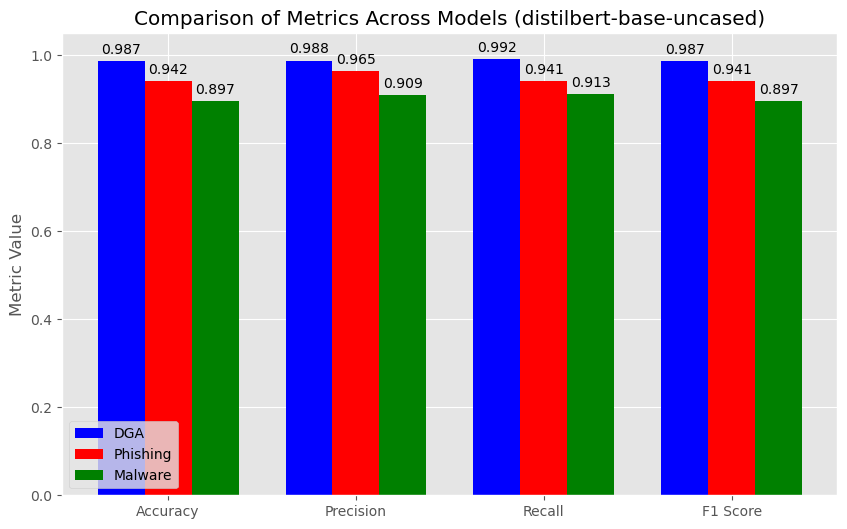

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of CSV log files for each model
log_dir = "logs"
csv_files = [
    f"{log_dir}/dga_training_logs_20250317_142145.csv", 
    f"{log_dir}/phishing_training_logs_20250317_133935.csv",
    f"{log_dir}/training_logs_20250316_213105.csv"
    ]
# Custom model names to be used on the plot
custom_names = ["DGA", "Phishing", "Malware"]

# Dictionary to store best metrics for each model
model_metrics = {}

# Process each CSV file and compute best values for each metric
for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    model_name = custom_names[i]
    best_acc = df['val_acc'].max()
    best_precision = df['val_precision'].max()
    best_recall = df['val_recall'].max()
    best_f1 = df['val_f1'].max()
    
    model_metrics[model_name] = {
        "Accuracy": best_acc,
        "Precision": best_precision,
        "Recall": best_recall,
        "F1 Score": best_f1
    }

# Define the metrics and prepare for plotting
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(metrics))  # positions for the groups
width = 0.25  # width of each bar within a group

fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each model
colors = {"DGA": "blue", "Malware": "green", "Phishing": "red"}

# Plot bars for each model
for i, model_name in enumerate(custom_names):
    # Retrieve values for the current model for each metric
    values = [model_metrics[model_name][metric] for metric in metrics]
    # Compute offset so that bars for each model are side by side
    offset = (i - 1) * width  # For 3 models: offsets will be -width, 0, and +width
    rects = ax.bar(x + offset, values, width, label=model_name, color=colors[model_name])
    
    # Add value annotations on top of each bar
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text slightly above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

# Set labels, title, and custom x-axis tick labels
ax.set_ylabel('Metric Value')
ax.set_title('Comparison of Metrics Across Models (distilbert-base-uncased)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)  # Adjust if needed for clarity
ax.legend()

plt.show()
